**ДИПЛОМНАЯ РАБОТА**

**Скворцова Ольга**

**PYDA-DIPLOM-36**

In [21]:
# Импортирую библиотеки, которые могут понадобиться

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import scipy.stats as st
from scipy import stats
import math
import seaborn as sns


**Загрузите файл HR.csv в pandas dataframe**

In [22]:
#Загружаю данные
data_HR = pd.read_csv('https://raw.githubusercontent.com/Skvorushka/netology_homework/main/HR.csv')
data_HR

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [23]:
'''Изучаю данные - пропусков нет.
Типы данных в столбцах, на мой взгляд, соответствуют их содержанию.'''

data_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# **Рассчитайте основные статистики для переменных**
## **(среднее,медиана,мода,мин/макс,сред.отклонение)**

In [24]:
'''Для последних 5 столбцов нет смысла смотреть статистики,
поэтому для данной задачи их исключу.
Здесь:
среднее = mean,
медиана = 50%,
минимум, максимум = min, max
сред. отклонение = std'''

data_HR_stat = data_HR.iloc[:, 0:5]
data_HR_stat.describe().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50
std,0.25,0.17,1.23,49.94,1.46
min,0.09,0.36,2.00,96.00,2.00
25%,0.44,0.56,3.00,156.00,3.00
50%,0.64,0.72,4.00,200.00,3.00
75%,0.82,0.87,5.00,245.00,4.00
max,1.00,1.00,7.00,310.00,10.00


In [25]:
'''Отдельно посчитаю моду, т.к. она не входит в метод describe.'''

print(f'Мода:\n{data_HR_stat.mode().iloc[0]}')

Мода:
satisfaction_level        0.10
last_evaluation           0.55
number_project            4.00
average_montly_hours    135.00
time_spend_company        3.00
Name: 0, dtype: float64


# **Рассчитайте и визуализировать корреляционную матрицу для**
# **количественных переменных.**

**Определите две самые скоррелированные и две наименее**
**скоррелированные переменные.**

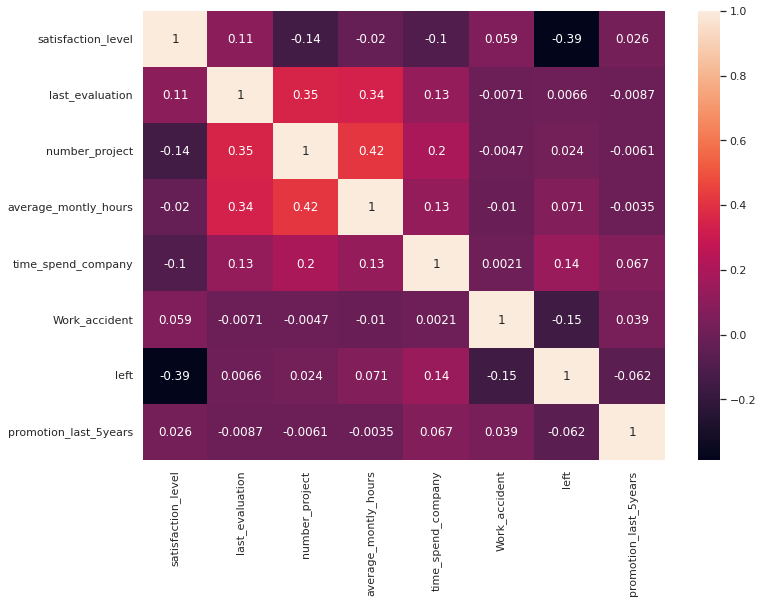

In [27]:
'''Считаю, в матрицах интересно будет посмотерть не только количественные переменные, 
но и несколько качественных, выраженных в числах (уволился ли сотрудник, повышался ли последние 5 лет,
были ли несчастные случаи на рабочем месте). Поэтому учитываю первые 8 столбцов.'''

data_HR_corr = data_HR.iloc[:, 0:8]

# Удобнее всего будет посмотреть корреляцию при помощи тепловой карты

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_HR_corr.corr(), annot=True)

**Вывод по количественным переменным:**

Две самые скоррелированные переменные "количество проектов" и "среднее кол-во часов в мес. на рабочем месте". Прямая зависимость, значение корреляции 42%.

Две наименее скоррелированные переменные "уровень удовлетворенности" и "среднее кол-во часов в мес. на рабочем месте", уровень корреляции 2%.

**Вывод для качественных переменных:**

Две самые скоррелированные переменные "уволился ли сотрудник" и "уровень удовлетворенности". Звучит логично. Отрицательное значение говорит об обратной зависимости - тоже логично, но само значения корреляции в 40%, субъективно, говорит о том, что она не слишком высока. В то же время, данные представлены за 10 лет работы компании (определено по самому большому стажу), и помимо уровня удовлетворенности будут еще факторы, которые не могут не влиять (уход на пенсию, в декрет, смена ценностей/интересов и как следствие - работы и т.д.), но здесь не учтены. Тем не менее, это одно из самых высоких значений корреляции в этих данных.

Две наименее скоррелированные переменные "наличие несчастных случаев на работе" и "стаж работы в компании", уровени корреляции 0,21%.

# **Тут можно увидеть pairplot, чтобы посмотреть взаимосвязи между всеми признаками. Но я его свернула из-за объема**

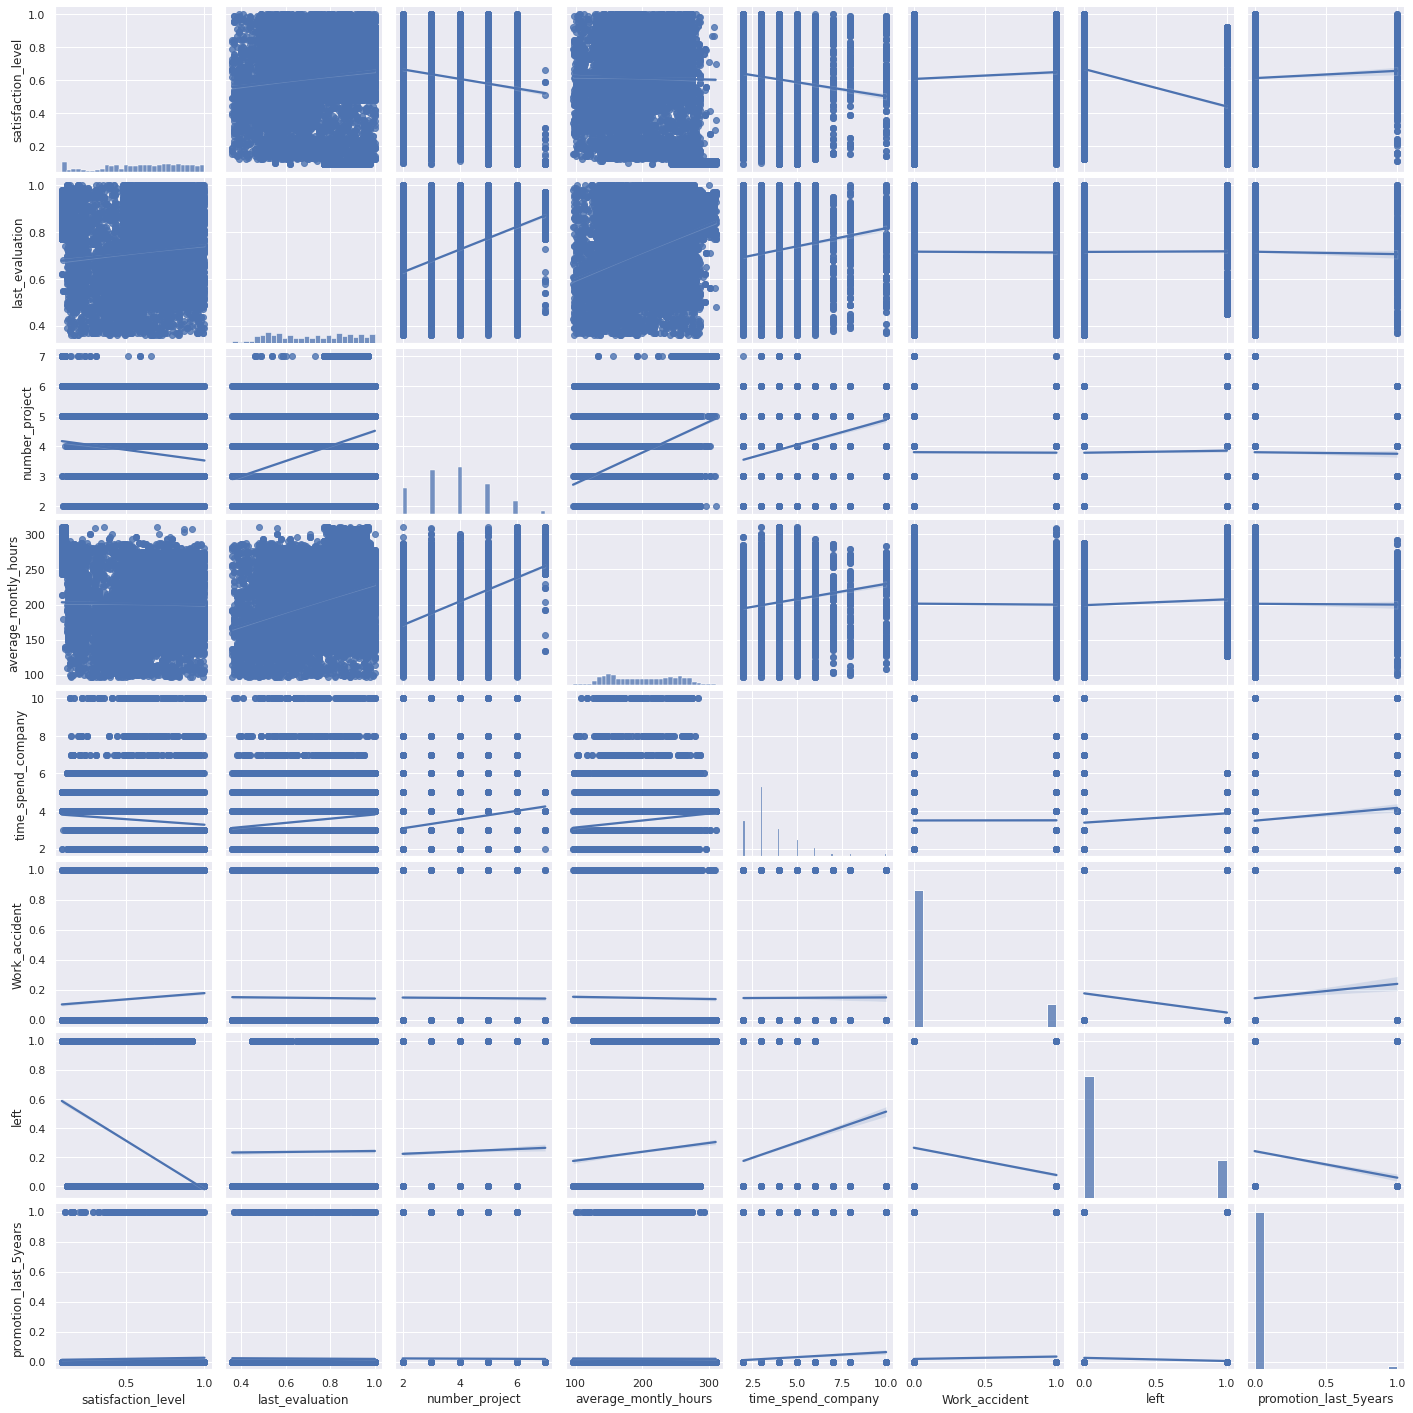

In [ ]:
sns.pairplot(data_HR_corr, kind='reg')

# **Для подтверждения выводов о корреляции построю графики зависимости**

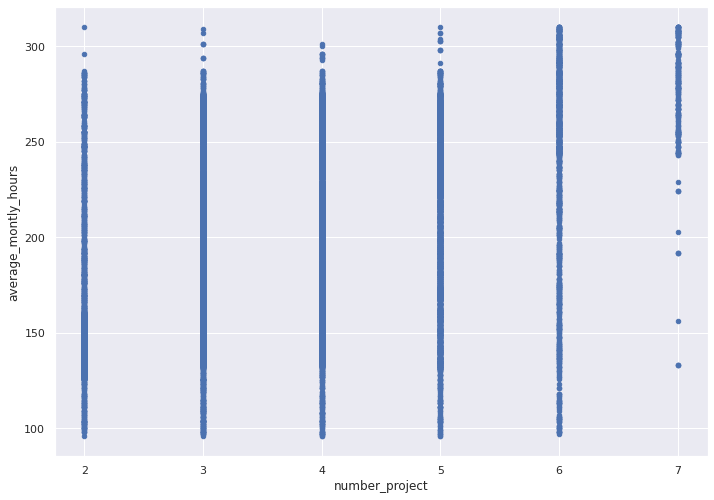

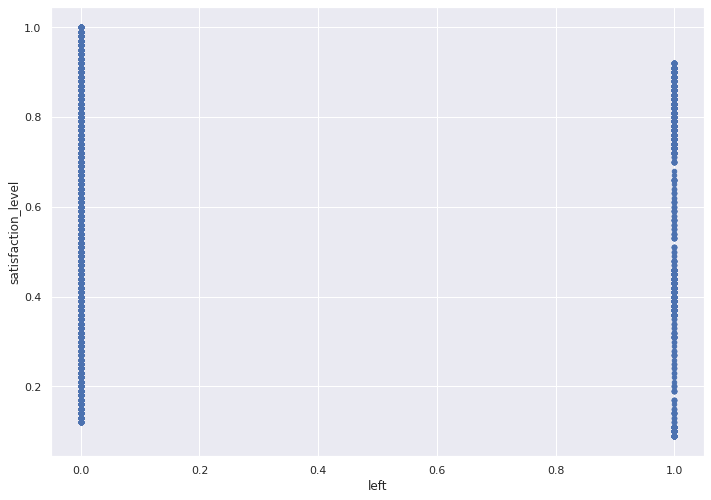

In [ ]:
# Для подтверждения выводов о корреляции построю графики зависимости

data_HR_corr.plot(kind='scatter', x='number_project', y='average_montly_hours')
data_HR_corr.plot(kind='scatter', x='left', y='satisfaction_level')

**Дополнение к выводу для количественных переменных:**

Зависимость начинает прослеживаться при количестве проектов больше 6,
хорошо видно, что на такое количество проектов уходит гораздо больше времени.

И еще видно, что на кол-во проектов меньше 6 почти никто не затрачивал больше 278 ч/мес.

Т.е. зависимость хорошо видно на граничных точках, а посередине - не так очевидно. Видимо, поэтому корреляция всего 42%.

**Дополнение к выводу для качественных переменных:**

Тоже лучше видно на пограничных точках. На pairplot еще хорошо помогает линия тренда, без нее, пожалуй, оценить сложнее.

# **Рассчитайте сколько сотрудников работает в каждом департаменте.**

In [ ]:
data_HR[['department', 'salary']].groupby('department').count()

,salary
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


# **Показать распределение сотрудников по зарплатам.**

In [ ]:
data_HR[['salary','department']].groupby('salary').count()

,department
salary,
high,1237
low,7316
medium,6446


# **Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности**

In [ ]:
data_HR_pivot = data_HR.pivot_table(index='salary', columns='department', values='number_project', 
                                        aggfunc='count', fill_value=0,  margins = True)
data_HR_pivot

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,All
salary,,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201,1237
low,609,364,358,335,180,402,451,2099,1146,1372,7316
medium,535,372,335,359,225,376,383,1772,942,1147,6446
All,1227,787,767,739,630,858,902,4140,2229,2720,14999


# **Проверить гипотезу, что сотрудники с высоким окладом**
# **проводят на работе больше времени, чем сотрудники с низким окладом**

In [28]:
'''Мне кажется, расчитать среднее время, проводимое на работе, между сотрудниками с низким и высоким окладом,
будет быстрее, проще и информативнее в данном случае, чем проверка гипотез.
Поэтому сначала приведу расчет, потом проверку гипотезы и мои соображения на этот счет. 

Расчитала среднее и моду - результаты похожи.
Причем по моде значения для сотрудников с низким и высоким окладом не отличаются,
а по среднему значению для людей с низким окладом даже превосходят. Т.е. гипотеза неверна.'''

data_average_montly_hours = data_HR[['salary','average_montly_hours']].groupby('salary').agg({'average_montly_hours': ['mean', 'quantile']}).round(1)
data_average_montly_hours

average_montly_hours         
                       mean quantile
salary                              
high                  199.9    199.0
low                   201.0    199.0
medium                201.3    201.0

In [29]:
'''Для проверки гипотезы использую тест Стьюдента для 2х выборок.
Вот тут мне не совсем ясно. Я могу проверить такие гипотезы:
Н0 - выборки одинаковы,
Н1 - выборки различны. Но то, что они различны, не значит, 
что время, проводимое на работе, больше именно у сотрудников с высоким окладом.
Поэтому не совсем ясно в чем смысл именно статистической проверки гипотез.
Проверю хотя бы одинаковы/различаются ли они'''

low = data_HR[data_HR.salary == 'low']['average_montly_hours']
high = data_HR[data_HR.salary == 'high']['average_montly_hours']

# Тест Стьюдента для 2х выборок
stat, p = st.ttest_ind(low, high)

print('Статистика=%.5f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Не отклоняем нулевую гипотезу, время, проводимое на работе, одинаково')
else:
    print('Отклоняем нулевую гипотезу, время, проводимое на работе, различается')

Статистика=0.72887, p=0.46610
Не отклоняем нулевую гипотезу, время, проводимое на работе, одинаково


**Вывод:**

Оба способа проверки говорят о том, что выдвинутая гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом, неверна. 

Эта задача для меня одна из самых неоднозначных, поэтому буду особенно рада обратной связи.

# **Рассчитать следующие показатели среди уволившихся и не**
# **уволившихся сотрудников (по отдельности):**

● **Доля сотрудников с повышением за последние 5 лет**

● **Средняя степень удовлетворенности**

● **Среднее количество проектов**

In [30]:
# Посчитаем долю сотрудников с повышением
# Сначала сведем данные в сводную таблицу с разбивкой уволился/не уволился

data_HR_proportion = data_HR.pivot_table(index='left', columns='promotion_last_5years', values='salary', 
                                        aggfunc='count', fill_value=0,  margins = True)
data_HR_proportion

promotion_last_5years,0,1,All
left,,,
0,11128,300,11428
1,3552,19,3571
All,14680,319,14999


In [31]:
# Затем функцией добавим расчетный стобец по доле
# Для этого кол-во сотрудников с повышением разделим на общее кол-во сотрудников

def proportion(row):
  return row[1] / row['All']

data_HR_proportion['proportion_promotion'] = data_HR_proportion.apply(proportion, axis= 1).round(3)
data_HR_proportion

promotion_last_5years,0,1,All,proportion_promotion
left,,,,
0,11128,300,11428,0.026
1,3552,19,3571,0.005
All,14680,319,14999,0.021


In [32]:
# Расчитаем средние степень удовлетвоернности и количество проектов в разбивке по группе left

data_HR_ind = data_HR[['left','satisfaction_level', 'number_project']].groupby('left').mean().round(2)
data_HR_ind

,satisfaction_level,number_project
left,,
0,0.67,3.79
1,0.44,3.86


**Наконец, выведем общую таблицу с требуемыми данными**

In [33]:
data_HR_indicators = data_HR_ind.join(data_HR_proportion['proportion_promotion'])
data_HR_indicators

,satisfaction_level,number_project,proportion_promotion
left,,,
0,0.67,3.79,0.026
1,0.44,3.86,0.005


# **Разделить данные на тестовую и обучающую выборки.**

**Построить модель LDA, предсказывающую уволился ли**
**сотрудник на основе имеющихся факторов (кроме department и**
**salary)**

**Оценить качество модели на тестовой выборки**

In [34]:
#Уберем последние 2 столбца (department и salary)
data_HR_LDA = data_HR.iloc[:, 0:8]
data_HR_LDA

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [35]:
# Разделяем выборку на тренировочную (75%) и тестовую (25%)
# Столбец left является таргетом

X_train, X_test, y_train, y_test = train_test_split(data_HR_LDA.iloc[:, [0, 1, 2, 3, 4, 5, 7]], data_HR_LDA['left'], test_size=0.25, random_state=42)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # обучаем данные
lda.predict(X_test) # делаем прогноз на тестовой выборке

print(f'Точность модели {accuracy_score(y_test, lda.predict(X_test)).round(2)}') # Оцениваем качество модели

Точность модели 0.75
